Полина Чижик, вариант 1 Число нейронов в скрытом слое - 20 Шаг градиентного спуска - 0.01

1 задание

Кросс-энтропия (Перекрестная энтропия) – это Функция потерь (Loss Function), 
которую можно использовать для количественной оценки разницы между двумя Распределениями вероятностей. Кросс-энтропия измеряет расхождение между двумя вероятностными распределениями. Если кросс-энтропия велика, это означает, что разница между двумя распределениями велика, а если кросс-энтропия мала, то распределения похожи друг на друга.

Регресс Softmax - это форма логистической регрессии, которая нормализует входное значение в вектор значений, который следует распределению вероятности, общая сумма которого равна 1. Выходные значения находятся в диапазоне [0,1]

2 задание

In [2]:
import torch
import random
import numpy as np
import sklearn.datasets

from sklearn.model_selection import train_test_split 

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target, 
    test_size=0.3, 
    shuffle=True
) 
X_train = torch.FloatTensor(X_train) 
X_test = torch.FloatTensor(X_test) 
y_train = torch.LongTensor(y_train) 
y_test = torch.LongTensor(y_test)

In [4]:
class WineNet(torch.nn.Module):
    def __init__(self,  n_hidden_neurons, activation = 'sigmoid',n_layers = 3):
        super(WineNet, self).__init__()
        if activation == 'sigmoid':
            act = torch.nn.Sigmoid()
        elif activation == 'relu':
            act = torch.nn.ReLU()
        self.act = act
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.hidden_layers = torch.nn.Sequential()
        for i in range(n_layers):
            self.hidden_layers.add_module(f'hidden_{i}',torch.nn.Linear(n_hidden_neurons, n_hidden_neurons))
            self.hidden_layers.add_module(f'act_{i}',act)
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.hidden_layers(x)
        x = self.fc3(x)
        return x
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

In [ ]:
Создадим нейронную сеть

In [5]:
wine_net = WineNet(2)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.01)
batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = wine_net.forward(x_batch) 
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.5185)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5556)
tensor(0.4630)
tensor(0.5556)
tensor(0.5000)
tensor(0.5000)
tensor(0.5556)
tensor(0.5370)
tensor(0.5000)
tensor(0.5370)
tensor(0.5370)
tensor(0.5000)
tensor(0.4815)
tensor(0.5000)
tensor(0.5370)
tensor(0.5370)
tensor(0.5185)
tensor(0.5556)
tensor(0.5556)
tensor(0.5370)
tensor(0.5556)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)


d:\python\projects_384\po\venv\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_9420\2529696004.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:204.)
  plt.scatter(X_train[indexes, 0],


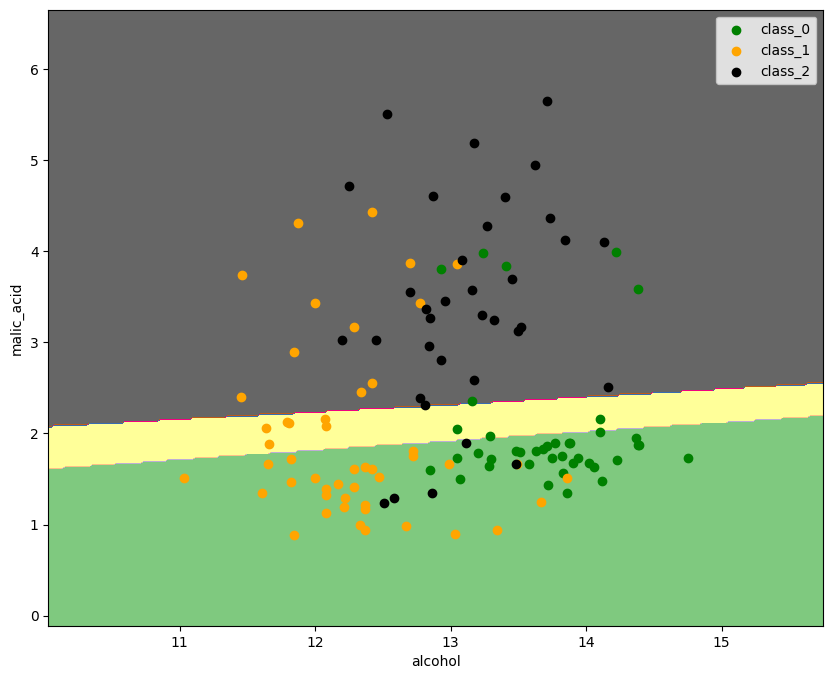

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

In [ ]:
Как видно, обучение нейронной сети с 2 нейронами на скрытом слое проходит неудачно.
Если повысить количество нейронов до 3, то обучение будет работать успешно. 
Из этого можно сделать вывод, что минимальное значение n_hidden_neurons, 
при котором сеть дает неудовлетворительные результаты равно 2.

3 задание

На обучение нейросети прямо влияет количество нейронов в скрытом слое. При увеличении их количества прямо пропорционально растет и точность при обучении сети (следует из опыта, описанного выше).

In [6]:
wine_net2 = WineNet(20, "sigmoid", 3)
optimizer2 = torch.optim.Adam(wine_net2.parameters(), lr=0.01)
for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer2.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = wine_net2.forward(x_batch) 
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer2.step()
        
    if epoch % 1000 == 0:
        test_preds = wine_net2.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.7778)
tensor(0.7963)
tensor(0.8148)
tensor(0.7593)


In [7]:
wine_net3 = WineNet(20, "sigmoid", 4)
optimizer3 = torch.optim.Adam(wine_net3.parameters(), lr=0.01)
for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer3.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = wine_net3.forward(x_batch) 
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer3.step()
        
    if epoch % 1000 == 0:
        test_preds = wine_net3.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.8333)
tensor(0.7963)
tensor(0.7407)
tensor(0.7963)


In [ ]:
качество не зависит от слоев

In [8]:
wine_net4 = WineNet(20, "sigmoid", 3)
optimizer4 = torch.optim.Adam(wine_net4.parameters(), lr=0.001)
for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer4.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = wine_net4.forward(x_batch) 
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer4.step()
        
    if epoch % 1000 == 0:
        test_preds = wine_net4.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.7037)
tensor(0.8519)
tensor(0.8519)
tensor(0.8333)


In [9]:
wine_net5 = WineNet(20, "relu", 3)
optimizer5 = torch.optim.Adam(wine_net5.parameters(), lr=0.001)
for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer5.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = wine_net5.forward(x_batch) 
        loss_value = loss(preds, y_batch)
        loss_value.backward() 
        optimizer5.step()
        
    if epoch % 1000 == 0:
        test_preds = wine_net5.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.3519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8704)
tensor(0.8519)


In [ ]:
Способ активации не повлияла на качество её обучения

4 задание

Изучим влияние на точность предсказаний

In [10]:
for i in np.linspace(0.1,0.8,8):
    print("test_size = " + str(i))
    X_train, X_test, y_train, y_test = train_test_split(
          wine.data[:, :2],
    wine.target, 
    test_size=i, 
    shuffle=True) 
    X_train = torch.FloatTensor(X_train) 
    X_test = torch.FloatTensor(X_test) 
    y_train = torch.LongTensor(y_train) 
    y_test = torch.LongTensor(y_test)

    wine_net6 = WineNet(20, "sigmoid", 3)
    optimizer6 = torch.optim.Adam(wine_net6.parameters(), lr=0.01)
    for epoch in range(5000):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer6.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]

            x_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = wine_net6.forward(x_batch) 

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer6.step()

        if epoch % 1000 == 0:
            test_preds = wine_net6.forward(X_test)
            test_preds = test_preds.argmax(dim=1)
            print((test_preds == y_test).float().mean())

test_size = 0.1
tensor(0.5000)
tensor(0.6667)
tensor(0.6667)
tensor(0.6667)
tensor(0.6667)
test_size = 0.2
tensor(0.5278)
tensor(0.8333)
tensor(0.8333)
tensor(0.7500)
tensor(0.7778)
test_size = 0.30000000000000004
tensor(0.3519)
tensor(0.8148)
tensor(0.7778)
tensor(0.8148)
tensor(0.7593)
test_size = 0.4
tensor(0.4583)
tensor(0.8194)
tensor(0.7361)
tensor(0.7500)
tensor(0.7917)
test_size = 0.5
tensor(0.3596)
tensor(0.6966)
tensor(0.7191)
tensor(0.6966)
tensor(0.7416)
test_size = 0.6
tensor(0.3832)
tensor(0.7757)
tensor(0.7850)
tensor(0.7477)
tensor(0.7383)
test_size = 0.7000000000000001
tensor(0.3600)
tensor(0.7760)
tensor(0.7680)
tensor(0.7600)
tensor(0.7280)
test_size = 0.8
tensor(0.3916)
tensor(0.5664)
tensor(0.6573)
tensor(0.6783)
tensor(0.6923)


In [11]:
base_rate = len(wine.target[wine.target == 1]) / len(wine.target)
print('base_rate :' + str(base_rate))

base_rate :0.398876404494382


In [ ]:
при test_size, примерно равном base_rate =0.4, точность предсказаний составила 0.8148;
при test_size = 0.6 и 0.8 точность получилась ниже

5 задание

Изучим поведение нейросети при изменении значения  batch_size

In [12]:
from time import time
bss = [10,50,100,1000]
times = []
for bs in bss:
    print('batch size = ' + str(bs))
    wine_net = WineNet(20)
    optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.01)
    start_time = time()
    for epoch in range(5000):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), bs):
            optimizer.zero_grad()
        
            batch_indexes = order[start_index:start_index+bs]
        
            x_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]
        
            preds = wine_net.forward(x_batch) 
        
            loss_value = loss(preds, y_batch)
            loss_value.backward()
        
            optimizer.step()
        
        if epoch % 1000 == 0:
            test_preds = wine_net.forward(X_test)
            test_preds = test_preds.argmax(dim=1)
            print((test_preds == y_test).float().mean())
    finish_time = time()
    print('working time = '+ str(finish_time - start_time))

batch size = 10
tensor(0.3916)
tensor(0.6713)
tensor(0.6783)
tensor(0.6783)
tensor(0.6853)
working time = 32.159708738327026
batch size = 50
tensor(0.3916)
tensor(0.6853)
tensor(0.6853)
tensor(0.6853)
tensor(0.6853)
working time = 8.50899624824524
batch size = 100
tensor(0.3916)
tensor(0.5105)
tensor(0.5804)
tensor(0.4825)
tensor(0.4895)
working time = 9.14599871635437
batch size = 1000
tensor(0.3916)
tensor(0.6993)
tensor(0.6503)
tensor(0.6503)
tensor(0.6503)
working time = 8.649410486221313


In [ ]:
При увеличении значения batch_size обучение происходит быстрее